In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from slepy import SLECalculator

In [29]:
with xr.open_dataset('/Users/jonniebarnsley/Downloads/control_run001/control_run001_thickness_0lev.nc') as file:
    thk = file.thickness
with xr.open_dataset('/Users/jonniebarnsley/Downloads/control_run001/control_run001_Z_base_0lev.nc') as file:
    zbase = file.Z_base

In [4]:
with SLECalculator() as calc:
    sle = calc.calculate_sle(thk, zbase, sum=False)

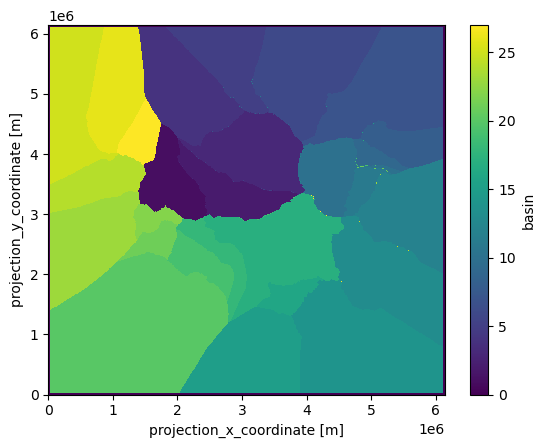

In [15]:
Zwally_basins = xr.open_dataset('/Users/jonniebarnsley/data/masks/zwally_basins_extended_8km.nc')
Zwally_basins.basin.plot()

In [20]:
by_basin = sle.groupby(Zwally_basins.basin).sum()
by_basin

<xarray.DataArray 'sle' (time: 94, basin: 28)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.76551724e-10, -3.87918877e-05, -1.06324685e-05, ...,
         1.44108353e-04,  4.25793370e-04, -4.47427556e-05],
       [-2.64827586e-09, -5.96078167e-05, -1.92913055e-05, ...,
         6.01795482e-05,  4.15669808e-04, -8.49752424e-05],
       ...,
       [ 6.67559724e-06, -2.92513337e-03, -1.34063213e-03, ...,
        -4.18388997e-03, -5.73751540e-03, -3.52410791e-03],
       [ 6.81030621e-06, -2.96309131e-03, -1.36069164e-03, ...,
        -4.20367324e-03, -5.79220762e-03, -3.55965331e-03],
       [ 6.95296000e-06, -3.00063714e-03, -1.38069148e-03, ...,
        -4.22334801e-03, -5.84788113e-03, -3.59517552e-03]])
Coordinates:
  * time     (time) float64 2.007e+03 2.008e+03 2.009e+03 ... 2.099e+03 2.1e+03
  * basin    (basin) float64 0.0 1.0 2.0 3.0 4.0 ... 23.0 24.0 25.0 26.0 27.0
Attributes:
    long_name:    Sea level equivalent
    units:        m
    methodology:  Goelzer et al. (2020)

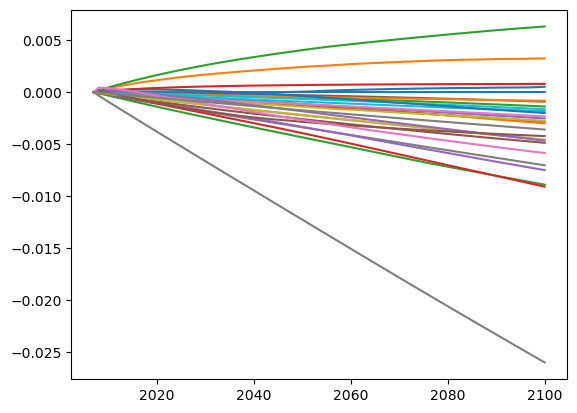

In [26]:
for basin in by_basin.basin:
    ts = by_basin.sel(basin=basin)
    plt.plot(ts.time, ts, label=str(int(basin.values)))

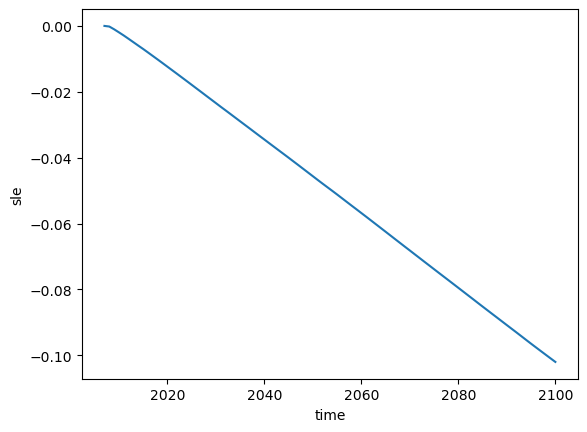

In [24]:
sle.sum(dim=['x', 'y']).plot()

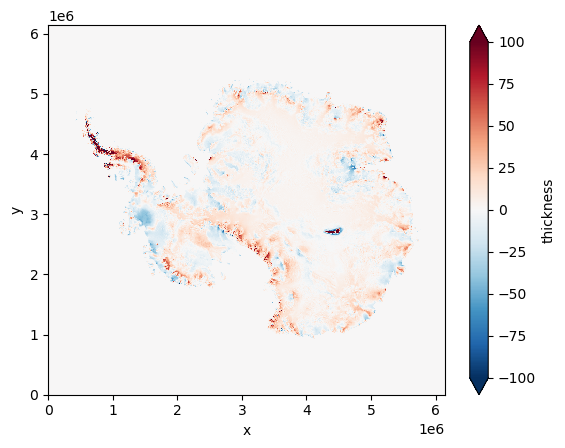

In [37]:
dthk = thk.isel(time=-1) - thk.isel(time=0)
dthk.plot(vmin=-100, vmax=100, cmap='RdBu_r')

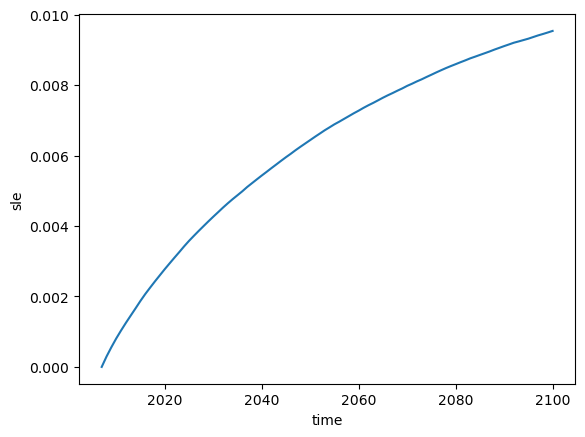

In [39]:
amundsen_sea = by_basin.sel(basin=slice(21, 22))
amundsen_sea.sum(dim='basin').plot()

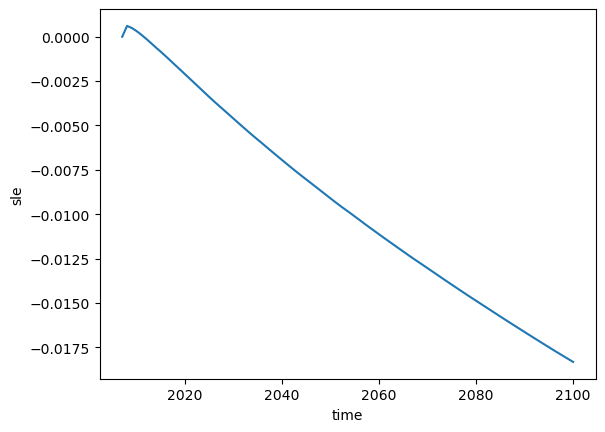

In [44]:
peninsula = by_basin.sel(basin=slice(24, 27))
peninsula.sum(dim='basin').plot()

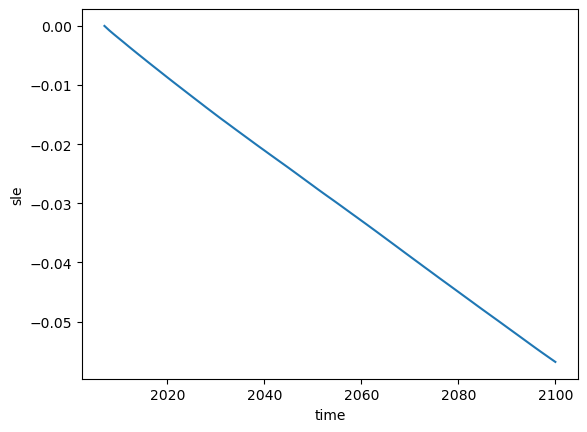

In [45]:
east_antarctica = by_basin.sel(basin=slice(2, 16))
east_antarctica.sum(dim='basin').plot()